In [2]:
import pandas as pd
path = '../data/R911R912 _明志蔡教授.xlsx'

xls = pd.ExcelFile(path)
sheets = xls.sheet_names
display(sheets)
df = pd.read_excel(path,sheet_name=sheets[-1])
for i in df.columns:
    df[i] = pd.to_numeric(df[i],errors='coerce') 
a = df.dropna(axis=1,how='all').set_index('Unnamed: 2')
a.index.name = 'time'
a.index = pd.to_datetime(a.index)
a.head()

['R911R912_TAG清單', 'R911R912_TAG相關錶點資料(停用)', 'R911R912_TAG相關錶點資料']

,ARO2-DCS-FI91304,ARO2-DCS-FI91401,ARO2-DCS-FI914A2,ARO2-DCS-FI914A3,ARO2-DCS-FI914B2,ARO2-DCS-FI914B3,ARO2-DCS-FI91501,ARO2-DCS-FI91502,ARO2-DCS-FI91503,ARO2-DCS-FI91504,...,ARO2-DCS-TI91502,ARO2-DCS-TI91602,ARO2-DCS-TI91701,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-LIMS-S708@Br.Index,ARO2-LIMS-S708@A9,ARO2-LIMS-S708@A10+,ARO2-LIMS-S708@Water,ARO2-LIMS-S708@Sulfur
time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,3.474542,1497.947144,1494.599609,1784.315796,1487.988403,1770.947021,25.988857,23.682142,25.698942,25.967953,...,173.800339,176.711975,178.199112,3.630703,3.090974,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,3.526301,1495.141602,1562.321289,1782.795166,1483.480591,1774.378052,23.068954,23.009315,22.766954,23.588520,...,173.995697,176.955658,178.028030,3.632458,2.996475,10.08,0.006,0.0,78.699997,0.04
2017-01-01 02:00:00,3.509516,2083.710693,2066.136475,1804.128662,2071.642578,1793.949341,22.981131,22.855104,22.351837,22.650213,...,174.248077,176.993118,178.067184,3.639654,3.123798,NaN,NaN,NaN,NaN,NaN
2017-01-01 03:00:00,3.418442,2058.168213,2054.372314,1769.391846,2058.044189,1770.947021,23.034639,22.991415,22.577875,22.592945,...,174.397903,176.912567,178.227356,3.664120,3.086786,NaN,NaN,NaN,NaN,NaN
2017-01-01 04:00:00,3.495442,2062.548828,2064.682129,1792.087646,2066.448975,1770.947021,22.990702,22.985022,23.600594,23.388973,...,174.572891,176.633621,178.169891,3.683519,3.091263,NaN,NaN,NaN,NaN,NaN


In [3]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
# Missing values statistics
missing_values = missing_values_table(a)
missing_values.head(20)

Your selected dataframe has 72 columns.
There are 72 columns that have missing values.


,Missing Values,% of Total Values
ARO2-LIMS-S708@Sulfur,37164,96.5
ARO2-LIMS-S708@Br.Index,37137,96.5
ARO2-LIMS-S708@Water,34654,90.0
ARO2-LIMS-S708@A10+,34632,90.0
ARO2-LIMS-S708@A9,34617,89.9
ARO2-DCS-PI913A1,23896,62.1
ARO2-DCS-PI913B1,23896,62.1
ARO2-DCS-RV1_ZONE_P,2778,7.2
ARO2-DCS-RV1_BED_P,2778,7.2
ARO2-DCS-RV_STEP_T,2778,7.2


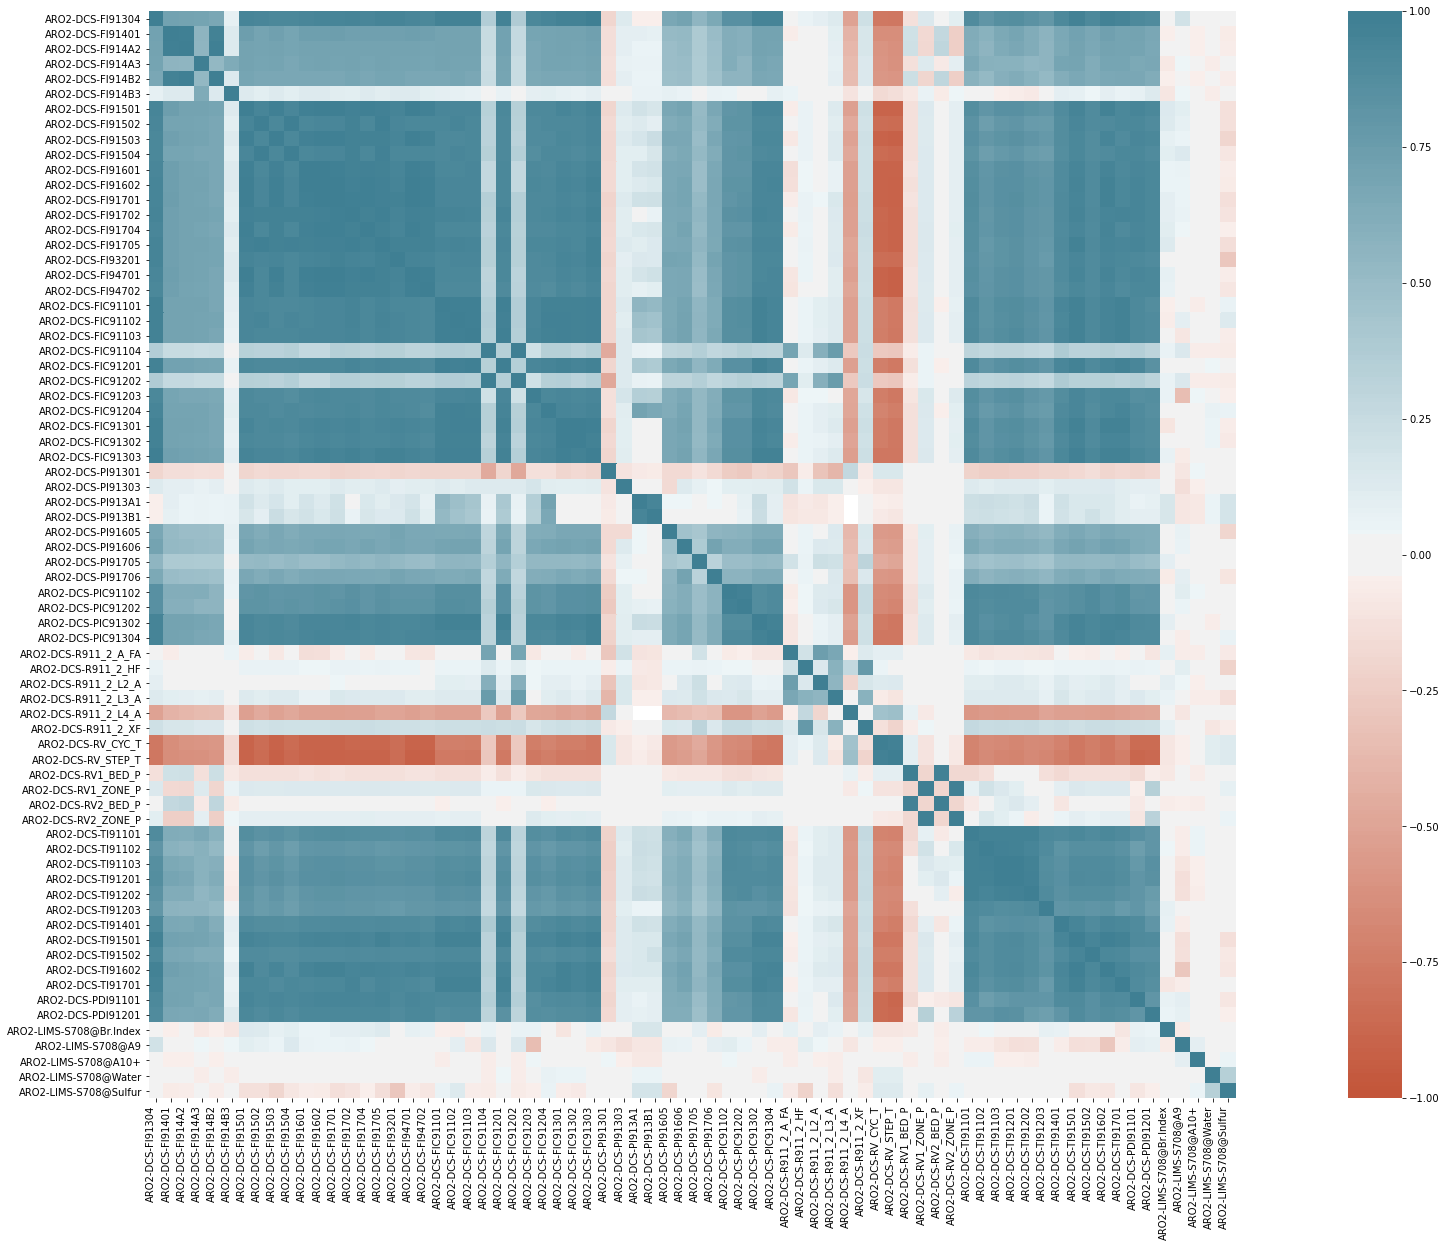

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))

ax = sns.heatmap(
    a.sample(9999).corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

<AxesSubplot:ylabel='Density'>

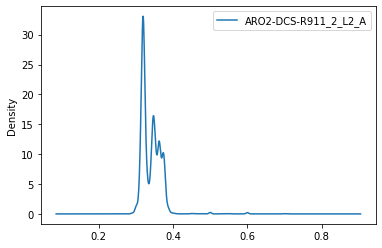

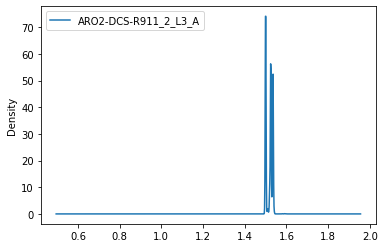

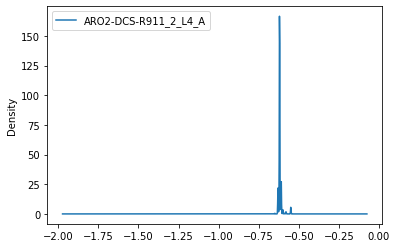

In [5]:
L2 = a.columns[a.columns.str.contains('L2')]
L3 = a.columns[a.columns.str.contains('L3')]
L4 = a.columns[a.columns.str.contains('L4')]
a[L2[0]] = pd.to_numeric(a[L2].values.reshape(-1),errors='coerce') 
a[L3[0]] = pd.to_numeric(a[L3].values.reshape(-1),errors='coerce') 
a[L4[0]] = pd.to_numeric(a[L4].values.reshape(-1),errors='coerce') 
a[L2].plot(kind='kde')
a[L3].plot(kind='kde')
a[L4].plot(kind='kde')

In [6]:
for L in [L2,L3,L4]:
    display(a.corr().abs()[L].sort_values(by=L[0],ascending=False).head(10))

,ARO2-DCS-R911_2_L2_A
ARO2-DCS-R911_2_L2_A,1.000000
ARO2-DCS-R911_2_A_FA,0.739034
ARO2-DCS-FIC91104,0.599487
ARO2-DCS-FIC91202,0.598760
ARO2-DCS-R911_2_L3_A,0.588642
ARO2-DCS-PI91301,0.298223
ARO2-DCS-R911_2_L4_A,0.238906
ARO2-DCS-R911_2_XF,0.232131
ARO2-DCS-PI91705,0.225293
ARO2-DCS-R911_2_HF,0.219218


,ARO2-DCS-R911_2_L3_A
ARO2-DCS-R911_2_L3_A,1.000000
ARO2-DCS-FIC91202,0.822922
ARO2-DCS-FIC91104,0.822627
ARO2-DCS-R911_2_A_FA,0.724144
ARO2-DCS-R911_2_L2_A,0.588642
ARO2-DCS-PI91301,0.434678
ARO2-DCS-R911_2_XF,0.429524
ARO2-DCS-R911_2_HF,0.428824
ARO2-DCS-PI91705,0.221397
ARO2-DCS-PIC91202,0.181286


,ARO2-DCS-R911_2_L4_A
ARO2-DCS-R911_2_L4_A,1.000000
ARO2-DCS-PIC91202,0.723396
ARO2-DCS-PIC91102,0.719895
ARO2-DCS-TI91101,0.697108
ARO2-DCS-TI91103,0.687422
ARO2-DCS-TI91201,0.683722
ARO2-DCS-TI91202,0.680901
ARO2-DCS-TI91102,0.669827
ARO2-DCS-PIC91304,0.660381
ARO2-DCS-TI91602,0.648812


['ARO2-DCS-R911_2_A_FA', 'ARO2-DCS-FIC91104', 'ARO2-DCS-FIC91202', 'ARO2-DCS-R911_2_L3_A', 'ARO2-DCS-PI91301', 'ARO2-DCS-R911_2_L4_A', 'ARO2-DCS-R911_2_XF', 'ARO2-DCS-PI91705', 'ARO2-DCS-R911_2_HF'] : ARO2-DCS-R911_2_L2_A


'ARO2-DCS-R911_2_L2_A 驗證分數:'

0.8629594149340213

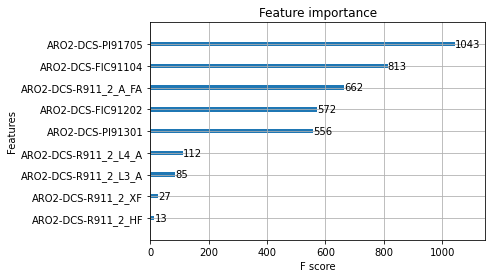

['ARO2-DCS-FIC91202', 'ARO2-DCS-FIC91104', 'ARO2-DCS-R911_2_A_FA', 'ARO2-DCS-R911_2_L2_A', 'ARO2-DCS-PI91301', 'ARO2-DCS-R911_2_XF', 'ARO2-DCS-R911_2_HF', 'ARO2-DCS-PI91705', 'ARO2-DCS-R911_2_L4_A'] : ARO2-DCS-R911_2_L3_A


'ARO2-DCS-R911_2_L3_A 驗證分數:'

0.9845772449641772

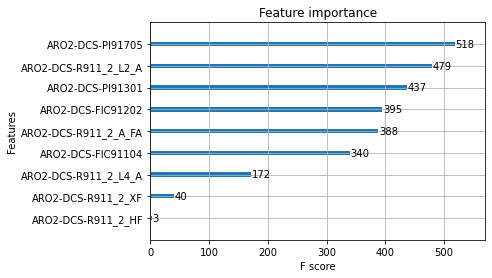

['ARO2-DCS-PI91705', 'ARO2-DCS-FIC91202', 'ARO2-DCS-FIC91104', 'ARO2-DCS-R911_2_XF', 'ARO2-DCS-PI91301', 'ARO2-DCS-R911_2_L2_A', 'ARO2-DCS-R911_2_L3_A', 'ARO2-DCS-R911_2_HF', 'ARO2-DCS-R911_2_A_FA'] : ARO2-DCS-R911_2_L4_A


'ARO2-DCS-R911_2_L4_A 驗證分數:'

0.9764576324120131

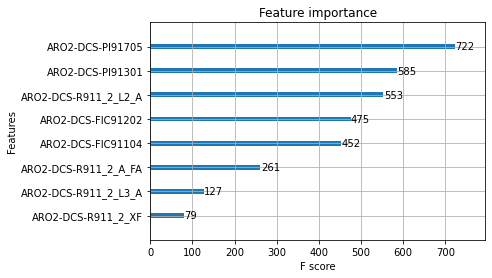

In [7]:
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import plot_importance

for L in [L2,L3,L4]:
    y_label = L[0]
    features = a.corr().abs()[L].sort_values(by=L[0],ascending=False).head(10).index.tolist()[1:]
    print(features,':',y_label)
    for i in a.columns:
        a[i] = pd.to_numeric(a[i],errors='coerce') 
    a = a[features+[y_label]].dropna(axis=0)

    X = a[features]
    y = a[y_label]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBRegressor()
    model.fit(X_train,y_train)
    display(f'{L[0]} 驗證分數:',model.score(X_test,y_test))
    plot_importance(model)
    plt.show()
